In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gtda.time_series import TakensEmbedding
from gtda.homology import SparseRipsPersistence as SV
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude
import iisignature as iis
import xgi
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [2]:
# PATH SIGNATURE


k1_values=[]
R_values=[]
labels=[]
Feature_vectors=list()
for j in range(1,11):
    for i in range(50):
        data=np.load(f"random_hypergraph_N_25_ps_[0.1, 0.01]_k1_{(j/32):.2f}_k2_0.00_ic_random_rep_{i}.npz")
        thetas=data["thetas"]
        thetas2=thetas[:,1000::10]
        time_series=thetas2.transpose()
        s=iis.prepare(25,2)
        feature_vector=iis.logsig(time_series,s)
        Feature_vectors.append(feature_vector)
        labels.append(f"{j/32}")
        l=len(thetas)
        order=1
        R_matrix=np.abs(np.sum(np.exp(1j * order * thetas), axis=0) /l)
        R=np.mean(R_matrix[1000:])
        #print(R)
        R_values.append(R)
        k1_values.append(j/32)
        
        
Feat=np.array(Feature_vectors)

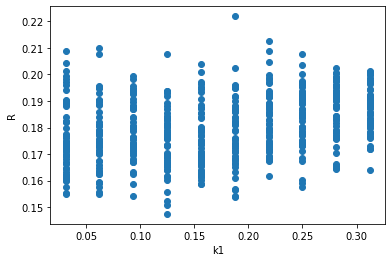

In [3]:
# PLOTTING R VALUES


plt.plot(k1_values,R_values,'o')
plt.ylabel("R")
plt.xlabel("k1")
plt.savefig("Test_32.png")

In [4]:
# TESTING PATH SGIANTREU WITH DIFFERENT METHODS AND DIFFERENT METRICS


#Separate data into train and test
X_train, X_test, y_train, y_test=train_test_split(Feat,labels,test_size=0.33)


#Random Forest
X_train_rf=X_train
X_test_rf=X_test
y_train_rf=y_train
y_test_rf=y_test
clf_rf=RandomForestClassifier().fit(X_train_rf,y_train_rf)
y_predicted_rf=clf_rf.predict(X_test_rf)

#Random Forest tests
print("Metrics of Random Forest")

print("Accuracy:")
acc_rf=accuracy_score(y_test_rf,y_predicted_rf)
print(acc_rf)
print("            ")

print("Precision")
pr_rf=precision_score(y_test_rf,y_predicted_rf, average="weighted")
print(pr_rf)
print("        ")

print("Recall")
rc_rf=recall_score(y_test_rf,y_predicted_rf, average="macro")
print(rc_rf)
print("         ")



#KNN
X_train_knn=X_train
X_test_knn=X_test
y_train_knn=y_train
y_test_knn=y_test

#scaling
#scaler = StandardScaler()
#scaler.fit(X_train_knn)
#X_train_knn = scaler.transform(X_train_knn)
#X_test_knn = scaler.transform(X_test_knn)


clf_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_knn,y_train_knn)
y_predicted_knn = clf_knn.predict(X_test_knn)

print("                                 ")
print("                                 ")
#Accuracy KNN
print("Metrics of KNN")

print("Accuracy:")
acc_knn=accuracy_score(y_test_knn,y_predicted_knn)
print(acc_knn)
print("         ")

print("Precision:")
pr_knn=precision_score(y_test_knn,y_predicted_knn, average="weighted")
print(pr_knn)
print("         ")

print("Recall:")
rc_knn=recall_score(y_test_knn,y_predicted_knn, average="macro")
print(rc_knn)
print("       ")


#Naive Bayes
X_train_nb=X_train
X_test_nb=X_test
y_train_nb=y_train
y_test_nb=y_test

clf_nb=GaussianNB().fit(X_train_nb,y_train_nb)
y_predicted_nb=clf_nb.predict(X_test_nb)

print("                                 ")
print("                                 ")
#Accuracy KNN
print("Metrics of Naive Bayes")

print("Accuracy:")
acc_nb=accuracy_score(y_test_nb,y_predicted_nb)
print(acc_nb)
print("         ")

print("Precision:")
pr_nb=precision_score(y_test_nb,y_predicted_nb, average="weighted")
print(pr_nb)
print("         ")

print("Recall:")
rc_nb=recall_score(y_test_nb,y_predicted_nb, average="macro")
print(rc_nb)
print("       ")




Metrics of Random Forest
Accuracy:
1.0
            
Precision
1.0
        
Recall
1.0
         
                                 
                                 
Metrics of KNN
Accuracy:
0.4121212121212121
         
Precision:
0.5793033229396866
         
Recall:
0.4381854256854257
       
                                 
                                 
Metrics of Naive Bayes
Accuracy:
0.9939393939393939
         
Precision:
0.9942583732057416
         
Recall:
0.99375
       


In [48]:
# PLOT OF THE ACCURACY VALUES WITH PATH SIGNATURE AND KNN, CHANGING K



accuracy_knn=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(Feat,labels,test_size=0.33)
        clf_knn= KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_predicted= clf_knn.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn[k-1,:]=acc_values_knn

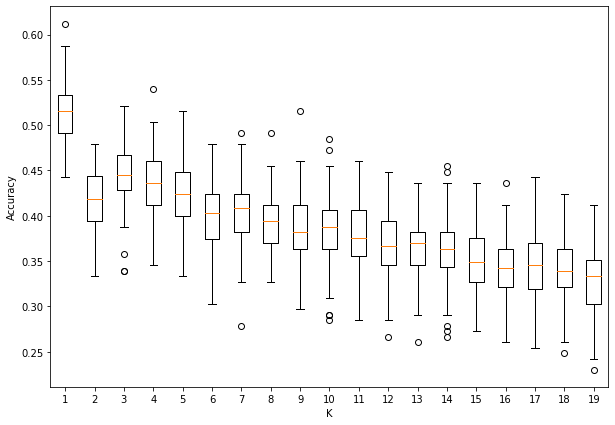

In [97]:
accuracy_knn_def=accuracy_knn.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_def)
plt.savefig("KNN_PS_32_H.png")
plt.show()

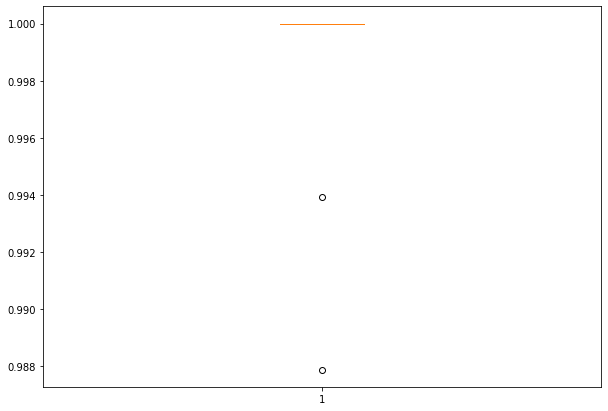

In [6]:
#PLOT OF RANDOM FOREST ACCURACY PATH SIGNATURE
acc_values_rf=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(Feat,labels,test_size=0.33)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

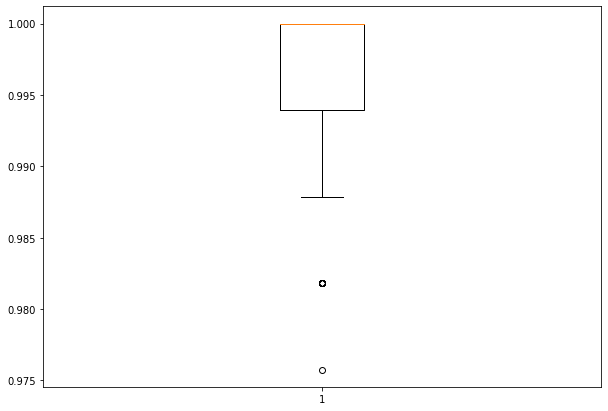

In [7]:
#PLOT OF NAIVE BAYES ACCURACY PATH SIGNATURE

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(Feat,labels,test_size=0.33)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()


In [27]:
# STABILITY OF PATH SIGNATURE (RANDOM FOREST)
accuracy_stability=np.zeros((6,150))
for h in [5,6,7,8,9,10]:
    labels=[]
    Feature_vectors_stab=list()
    for j in range(1,11):
        for i in range(50):
            data=np.load(f"random_hypergraph_N_25_ps_[0.1, 0.01]_k1_{(j/32):.2f}_k2_0.00_ic_random_rep_{i}.npz")
            thetas=data["thetas"]
            thetas2=thetas[:,1000::h]
            time_series=thetas2.transpose()
            s=iis.prepare(25,2)
            feature_vector=iis.logsig(time_series,s)
            Feature_vectors_stab.append(feature_vector)
            labels.append(f"{j}")
    Feat_stab=np.array(Feature_vectors_stab)
    acc_values=[]    
    for k in range(150):
            X_train, X_test, y_train, y_test=train_test_split(Feat_stab,labels,test_size=0.33)
            clf_rf=RandomForestClassifier().fit(X_train,y_train)
            y_predicted=clf_rf.predict(X_test)
            acc=accuracy_score(y_test,y_predicted)
            acc_values.append(acc)
    accuracy_stability[h-5,:]=acc_values
    
   

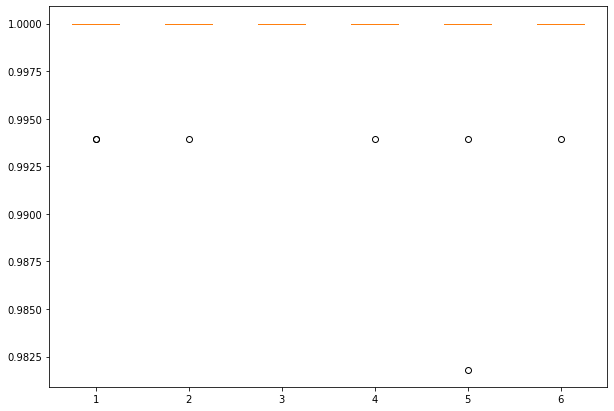

In [29]:
accuracy_stability_def=accuracy_stability.transpose()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(accuracy_stability_def)
plt.savefig("TEST_STABILITY_PS_32_H.png")
plt.show()

In [9]:
# TAKENS EMBEDDING

labels_tda=[]
Feature_vectors_tda=list()
for j in range(1,11):
    for i in range(50):
        data=np.load(f"random_hypergraph_N_25_ps_[0.1, 0.01]_k1_{(j/32):.2f}_k2_0.00_ic_random_rep_{i}.npz")
        thetas=np.sin(data["thetas"])
        TE=TakensEmbedding(time_delay=40,dimension=3,stride=19)
        point_cloud=TE.fit_transform(thetas)
        SVd = SV(homology_dimensions=[0,1]) 
        diagrams = SVd.fit_transform(point_cloud)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(diagrams)
        A=Amplitude()
        ampl_feat=A.fit_transform(diagrams)
        feat1=pe_feat.flatten()
        feat2=ampl_feat.flatten()
        feat=np.concatenate((feat1,feat2), axis=0)
        Feature_vectors_tda.append(feat)
        labels_tda.append(f"{j/32}")
        
Feat_tda=np.array(Feature_vectors_tda)

In [83]:
# TESTING TAKENS EMBEDDING WITH DIFFERENT METHODS AND DIFFERENT METRICS


#Separate data into train and test
X_train, X_test, y_train, y_test=train_test_split(Feat_tda,labels_tda,test_size=0.2)


#Random Forest
X_train_rf=X_train
X_test_rf=X_test
y_train_rf=y_train
y_test_rf=y_test
clf_rf=RandomForestClassifier().fit(X_train_rf,y_train_rf)
y_predicted_rf=clf_rf.predict(X_test_rf)

#Random Forest tests
print("Metrics of Random Forest")

print("Accuracy:")
acc_rf=accuracy_score(y_test_rf,y_predicted_rf)
print(acc_rf)
print("            ")

print("Precision")
pr_rf=precision_score(y_test_rf,y_predicted_rf, average="weighted")
print(pr_rf)
print("        ")

print("Recall")
rc_rf=recall_score(y_test_rf,y_predicted_rf, average="macro")
print(rc_rf)
print("         ")



#KNN
X_train_knn=X_train
X_test_knn=X_test
y_train_knn=y_train
y_test_knn=y_test

#scaling
#scaler = StandardScaler()
#scaler.fit(X_train_knn)
#X_train_knn = scaler.transform(X_train_knn)
#X_test_knn = scaler.transform(X_test_knn)


clf_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_knn,y_train_knn)
y_predicted_knn = clf_knn.predict(X_test_knn)

print("                                 ")
print("                                 ")
#Accuracy KNN
print("Metrics of KNN")

print("Accuracy:")
acc_knn=accuracy_score(y_test_knn,y_predicted_knn)
print(acc_knn)
print("         ")

print("Precision:")
pr_knn=precision_score(y_test_knn,y_predicted_knn, average="weighted")
print(pr_knn)
print("         ")

print("Recall:")
rc_knn=recall_score(y_test_knn,y_predicted_knn, average="macro")
print(rc_knn)
print("       ")


#Naive Bayes
X_train_nb=X_train
X_test_nb=X_test
y_train_nb=y_train
y_test_nb=y_test

clf_nb=GaussianNB().fit(X_train_nb,y_train_nb)
y_predicted_nb=clf_nb.predict(X_test_nb)

print("                                 ")
print("                                 ")
#Accuracy KNN
print("Metrics of Naive Bayes")

print("Accuracy:")
acc_nb=accuracy_score(y_test_nb,y_predicted_nb)
print(acc_nb)
print("         ")

print("Precision:")
pr_nb=precision_score(y_test_nb,y_predicted_nb, average="weighted")
print(pr_nb)
print("         ")

print("Recall:")
rc_nb=recall_score(y_test_nb,y_predicted_nb, average="macro")
print(rc_nb)
print("       ")




Metrics of Random Forest
Accuracy:
1.0
            
Precision
1.0
        
Recall
1.0
         
                                 
                                 
Metrics of KNN
Accuracy:
1.0
         
Precision:
1.0
         
Recall:
1.0
       
                                 
                                 
Metrics of Naive Bayes
Accuracy:
0.98
         
Precision:
0.9816783216783217
         
Recall:
0.9780219780219781
       


In [52]:
# PLOT OF THE ACCURACY VALUES WITH TAKENS EMBEDDING AND KNN, CHANGING K



accuracy_knn_te=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(Feat_tda,labels_tda,test_size=0.33)
        clf_knn= KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_predicted= clf_knn.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn_te[k-1,:]=acc_values_knn




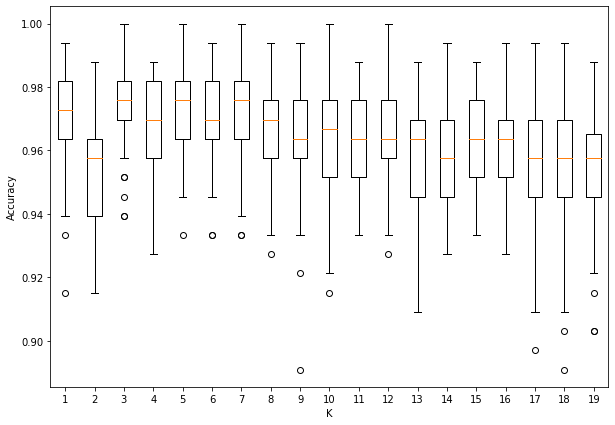

In [96]:
accuracy_knn_te_def=accuracy_knn_te.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_te_def)
plt.savefig("KNN_TE_32_H.png")
plt.show()

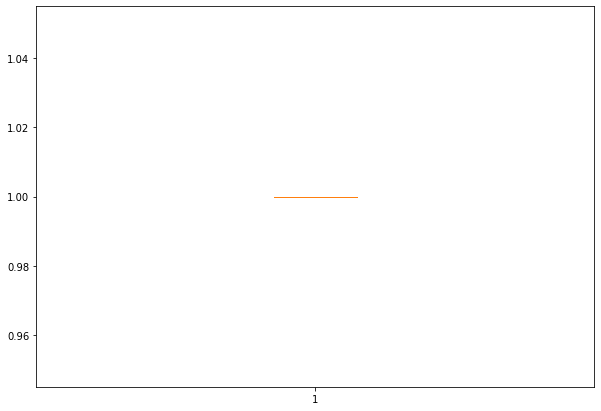

In [12]:
#PLOT OF RANDOM FOREST ACCURACY TAKENS EMBEDDING
acc_values_rf=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(Feat_tda,labels_tda,test_size=0.33)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

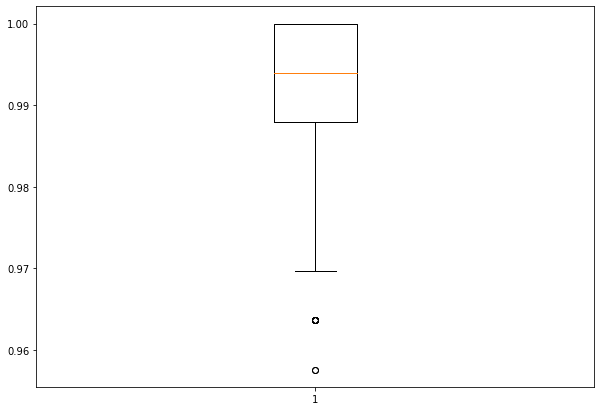

In [13]:
#PLOT OF NAIVE BAYES ACCURACY TAKENS EMBEDDING

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(Feat_tda,labels_tda,test_size=0.33)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()


In [85]:
#COMPARING DIMENSION IN TAKENS EMBEDDING (NAIVE BAYES)


accuracy_compared=np.zeros((4,100))

for k in [2,3,4,5]:
    labels_tda=[]
    Feature_vectors_tda_dim=list()
    for j in range(1,11):
            for i in range(50):
                data=np.load(f"random_hypergraph_N_25_ps_[0.1, 0.01]_k1_{(j/32):.2f}_k2_0.00_ic_random_rep_{i}.npz")
                thetas=np.sin(data["thetas"])
                TE=TakensEmbedding(time_delay=40,dimension=k,stride=19)
                point_cloud=TE.fit_transform(thetas)
                SVd = SV(homology_dimensions=[0,1]) 
                diagrams = SVd.fit_transform(point_cloud)
                PE = PersistenceEntropy()
                pe_feat = PE.fit_transform(diagrams)
                A=Amplitude()
                ampl_feat=A.fit_transform(diagrams)
                feat1=pe_feat.flatten()
                feat2=ampl_feat.flatten()
                feat=np.concatenate((feat1,feat2), axis=0)
                Feature_vectors_tda_dim.append(feat)
                labels_tda.append(f"{j/32}")
    Feat_tda_dim=np.array(Feature_vectors_tda_dim)
    acc_val_nb=[]
    for l in range(100):
        X_train, X_test, y_train, y_test=train_test_split(Feat_tda_dim,labels_tda,test_size=0.33)
        clf_nb=GaussianNB().fit(X_train,y_train)
        y_predicted=clf_nb.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_val_nb.append(acc)
    accuracy_compared[k-2,:]=acc_val_nb
        

        

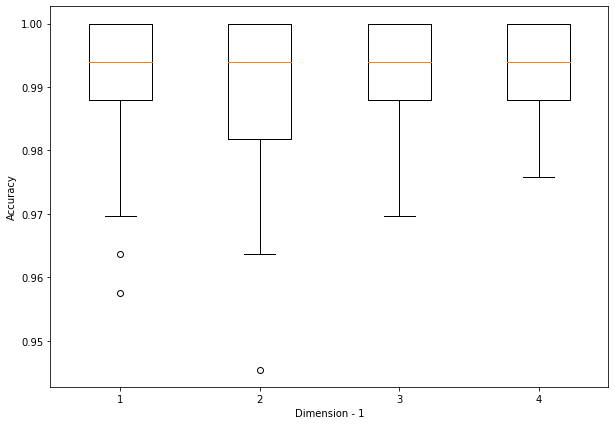

In [92]:
#accuracy_compared_def=accuracy_compared.transpose()
accuracy_compared_def=accuracy_compared.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("Dimension - 1")
plt.boxplot(accuracy_compared_def)
plt.savefig("TEST_DIMENSION_TAKENS_32_H.png")
plt.show()
        

In [15]:
# TESTING DIFFERENT TIME DELAYS AND STRIDES OF TIME DELAY EMBEDDING (DIMENSION=3)

accuracy_compared_td=np.zeros((8,100))

for k in [3,4,5,6,7,8,9,10]:
    labels_tda=[]
    Feature_vectors_tda_td=list()
    for j in range(1,11):
            for i in range(50):
                data=np.load(f"random_hypergraph_N_25_ps_[0.1, 0.01]_k1_{(j/32):.2f}_k2_0.00_ic_random_rep_{i}.npz")
                thetas=np.sin(data["thetas"])
                TE=TakensEmbedding(time_delay=10*k,dimension=3,stride=5*k-1)
                point_cloud=TE.fit_transform(thetas)
                SVd = SV(homology_dimensions=[0,1]) 
                diagrams = SVd.fit_transform(point_cloud)
                PE = PersistenceEntropy()
                pe_feat = PE.fit_transform(diagrams)
                A=Amplitude()
                ampl_feat=A.fit_transform(diagrams)
                feat1=pe_feat.flatten()
                feat2=ampl_feat.flatten()
                feat=np.concatenate((feat1,feat2), axis=0)
                Feature_vectors_tda_td.append(feat)
                labels_tda.append(f"{j/32}")
    Feat_tda_td=np.array(Feature_vectors_tda_td)
    acc_val_nb=[]
    for l in range(100):
        X_train, X_test, y_train, y_test=train_test_split(Feat_tda_td,labels_tda,test_size=0.33)
        clf_nb=GaussianNB().fit(X_train,y_train)
        y_predicted=clf_nb.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_val_nb.append(acc)
    accuracy_compared_td[k-3,:]=acc_val_nb

        

        


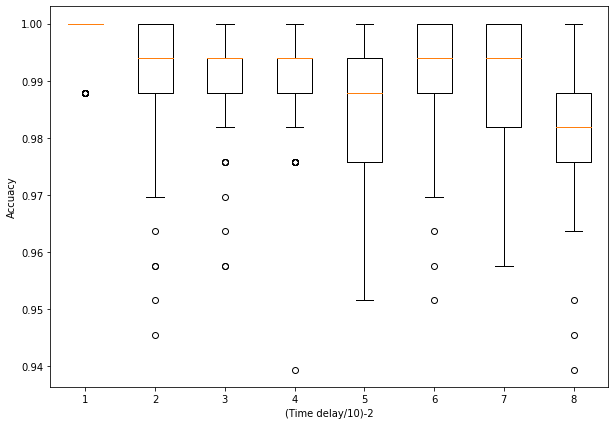

In [93]:
accuracy_compared_td_def=accuracy_compared_td.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuacy")
plt.xlabel("(Time delay/10)-2")
plt.boxplot(accuracy_compared_td_def)
plt.savefig("TEST_TIME_DELAY_TAKENS_32_H.png")
plt.show()